# 1. Problem Statement & Hypothesis

## Big Mart Sales Practice Problem
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. The data also includes certain attributes of each product and store.

### Objective
The objective is to build a predictive model and find out the sales of each product at a particular store. Big Mart will use this model to understand the properties of products and stores which play a key role in increasing sales.

### Metric
The model performance will be evaluated on the basis of its prediction of the sales for the test data. Big Mart will use Root Mean Square Error (RMSE) value to judge your response.

### Hypothesis
This is a crucial step in the ML process. It involves understanding the problem and making some hypothesis about what factors could potentially affect the outcome of the problem statement. This step should be done BEFORE looking at the data.

### Store level hypotheses:
- City type – Store located in Tier 1 cities should have higher sales due to higher average income level
- Population density – Stores that are located in high popuplation density area should experience higher demand, therefore, higher sales
- Store capacity – Big stores act like a one-stop-shops and people prefer to get everything in one place, therefore big stors tend to have higher sales
- Competitors – Stores located in areas with similar establishments nearby should have less sales due to competition
- Marketing – Stores that has a good marketing team should have higher sales and it can attracts customers with the right offers and advertising
- Customer behaviour – Stores keeping highly demanded products by local customers should experience higher sales
- Ambiance – Stores that are well-maintained and has great customer service are expected to have higher sales

### Product level hypotheses:
- Brand – Popular brand products should have higher sales due to loyal and higher trust from customers
- Packaging – Good packaging can attract customers and sell more
- Utility – Daily use products should have a higher tendency to sell
- Display Area – Products with bigger shelves space are likely to catch customers attention and sell more
- Visibility in Store – The location of product in a store will impact sales (e.g. right at entrance or near the tills)
- Advertising – Better advertising of products should lead to higher sales
- Promotional Offers – Offers that are attractive to customers will sell more

# 2. Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
train_df = pd.read_csv('Data/BigMartSalesPrediction/Train_BigMartSalesPrediction.csv')
test_df = pd.read_csv('Data/BigMartSalesPrediction/Test_BigMartSalesPrediction.csv')

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Observations**
- Item_Identifier – **ID variable**
- Item_Weight – Not considered in hypothesis
- Item_Fat_Content – **Linked to ‘Utility’**
- Item_Visibility – **Linked to ‘Display Area’**
- Item_Type – **More inferences about ‘Utility’**
- Item_MRP – Not considered in hypothesis
- Outlet_Identifier – **ID variable**
- Outlet_Establishment_Year – Not considered in hypothesis
- Outlet_Size – **Linked to ‘Store Capacity’**
- Outlet_Location_Type – **Linked to ‘City Type’**
- Outlet_Type – **Linked to ‘Store Capacity’**
- Item_Outlet_Sales – **Outcome variable**

It is generally a good idea to combine both train and test datasets into one, perform feature engineering and then divide them again. Let’s combine them into a dataframe with a ‘source’ column

In [4]:
train_df['source'] = 'train'
test_df['source'] = 'test'
df = pd.concat([train_df,test_df],ignore_index=True, sort=True)
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [5]:
df.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


**Check for missing values**

In [6]:
df.apply(lambda x:sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

**Observations**
- Note that the 5681 missing values **Outcome Variable** `Item_Outlet_Sales` comes from the test dataset, which is normal as those are the values we are trying to predict. 
- In terms of `Item_Weight` and `Outlet_Size` we will impute the missing values in the data cleaning section. 

Below is a more visualise way of finding the missing values

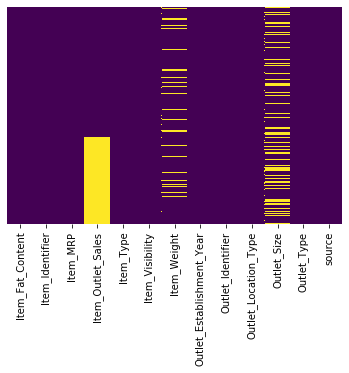

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

**Numerical variables exploration**

In [8]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


**Observations**
- `Item_Visibility` has a minimum value of 0, which makes no sense because when a product is being sold in a store, the product cannot have 0 visibility
- `Outlet_Establishment_Years` vary from 1985 to 2009. If we can convert them to how old the particular store is, the variable should have a better impact on sales

**Categorical variables exploration**

In [9]:
df.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

**Observations**
- There are 1559 products and 10 outlet stores. 
- There are 16 unique Item_Type. 

Let’s explore these categorical variables further! We want to return the unique values and frequency for each of these categorical variables (object). 

We will exclude the `ID` and `source` variable for obvious reason

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [11]:
categorical_new = [x for x in df.dtypes.index if df.dtypes[x] == 'object']

In [12]:
categorical_nonId = [x for x in categorical_new if x not in ['Item_Identifier','Outlet_Identifier','source']]

In [13]:
for item in categorical_nonId:
    print('\nFrequency of Categories for variable %s' %item)
    print(df[item].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int6

**Observations**
- With `Item_Fat_Content`, there are some mislabelling which we need to clean up
- With `Item_Type`, we can try to combine different categories as not all categories have substantial frequency
- With `Outlet_Type`, we could combine **Type2** and **Type3** but we should check if that’s a good idea

# 3. Data Cleaning

This steps involve imputing **missing values** and **treating outliers**. Treating outliers are important for regression techniques although advanced tree based algorithms are impervious to them.

Above, we found two variables with missing values, `Item_Weight` and `Outlet_Size`!

In [14]:
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier') #aggfunc is mean by default!

In [15]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [16]:
print ('Orignal #missing: %d'%sum(df['Item_Weight'].isnull()))
df['Item_Weight'] = df[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(df['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [17]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns = 'Outlet_Type',aggfunc=lambda x: x.mode())

In [18]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

In [20]:
print ('Orignal #missing: %d'%sum(df['Outlet_Size'].isnull()))
df['Outlet_Size'] = df[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(df['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


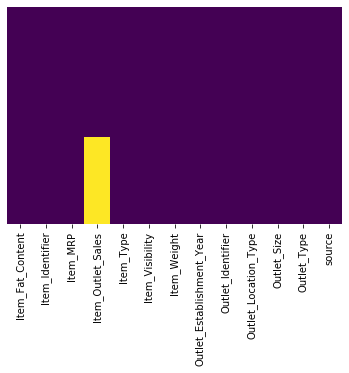

In [21]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

# 4. Feature Engineering
In this section, we will make our data ready for analysis by modifying/creating new variables

### A. Combining Outlet_Type
- In the data exploration section, we decided to consider combining the Supermarket **Type2** and **Type3** variables. 
- In order to check if this is a good idea we can analyse the mean sales by the type of store. If they have similar sales, then keeping them separate won’t help much

In [22]:
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


The above shows significant difference between Supermarket **Type2** and **Type3**, therefore, we will leave them separate as it is.


### B. Modify Item_Visibility
- We noticed at the beginning that the minimum value for `Item_Visibility` is 0, which doesn’t make any sense. 
- We have decided to treat the 0 like missing information and impute it with mean visibility of that product

In [23]:
visibility_item_avg = df.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [24]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

In [25]:
print ('Original #zeros: %d'%sum(df['Item_Visibility'] == 0))
df['Item_Visibility'] = df[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(df['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


Previously we have hypothesised that products with higher visibility are likely to sell more. We should also look at the visibility of the product in that particular store relative to the mean visibility of that product across all stores. This will give us a sense of how important the product is in that particular store relative to other stores

In [26]:
df['Item_Visibility_MeanRatio'] = df.apply(lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'] \
                                           [visibility_item_avg.index == x['Item_Identifier']][0],axis=1).astype(float)

In [27]:
df['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

### C. Create a broad category of Item_Type
Earlier, we saw 16 unique categories in the `Item_Type` variable but some categories have very little ‘frequency’. 
It might be a good idea to combine the categories. One way could be to assign a new category to each. 
If you look at the `Item_Identifier`, it starts with **FD, DR or NC** which seems to indicate Food, Drinks and Non-Consumables. Let’s use this to set up new categories

In [28]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000


In [29]:
df['Item_Type_New'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [30]:
df['Item_Type_New'] = df['Item_Type_New'].map({'FD': 'Food',
                                              'DR': 'Drinks',
                                              'NC': 'Non-Consumable'})

In [31]:
df['Item_Type_New'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_New, dtype: int64

In [32]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_New
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable


### D. Years of store operation
The latest year within our data is 2013 so we can use this and the establishment year variable to calculate the years of operation of a store. 
The result shows that store in our dataset are 4 – 28 years old.

In [33]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### E. Modify Item_Fat_Content

Earlier, we spotted that there are some mislabelling in the Item_Fat_Content variable. 

In addition, we noticed that some non-consumables are labelled as ‘Low Fat’ content which doesn’t make sense so we are going to fix this too by creating a separate category to spot this!

In [34]:
print('Original Categories:')
print(df['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [35]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                        'low fat': 'Low Fat',
                                                        'reg': 'Regular'})
print('Modified Categories:')
print(df['Item_Fat_Content'].value_counts())

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [36]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_New,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable,26


In [37]:
df.loc[df['Item_Type_New'] == 'Non-Consumable','Item_Fat_Content'] = 'Non-Edible'

In [38]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### F. Numerical and Categorical Variables – Dummy variables

Since `scikit-learn only accepts numerical variables`, we need to convert all categories of nominal variables into numeric types. 

Let’s start with turning all categorical variables into numerical values using `LabelEncoder` (Encode labels with value between 0 and n_classes-1) from sklearn’s preprocessing module!

After that, we can use `get_dummies` to generate dummy variables from these numerical categorical variables

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

In [42]:
cat_var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_New','Outlet_Type','Outlet']
le = LabelEncoder()

for i in cat_var_mod:
    df[i] = le.fit_transform(df[i])

In [43]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_New,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,0.931078,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0.933420,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,0.960069,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1.000000,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,1.000000,2,26,1


In [44]:
df = pd.get_dummies(df, columns = cat_var_mod)

In [45]:
df.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_New_0                uint8
Item_Type_New_1                uint8
Item_Type_New_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

### G. Exporting Data
Final step of this section is to convert the data back to train and test datasets. We also need to do some final tidying of deleting some columns before and after the split

In [46]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [47]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [48]:
train.drop(['source'],axis=1,inplace=True)

/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [50]:
train.to_csv('Data/BigMartSalesPrediction/train_modified.csv',index=False)
test.to_csv('Data/BigMartSalesPrediction/test_modified.csv',index=False)

In [51]:
train_df = pd.read_csv('Data/BigMartSalesPrediction/train_modified.csv')
test_df = pd.read_csv('Data/BigMartSalesPrediction/test_modified.csv')

## Baseline Model

This model requires no predictive model (more like an informed guess). Here we will predict sales as the overall average sales

In [52]:
mean_sales = train_df['Item_Outlet_Sales'].mean()

In [53]:
baseline_submission = pd.DataFrame({
    'Item_Identifier':test_df['Item_Identifier'],
    'Outlet_Identifier':test_df['Outlet_Identifier'],
    'Item_Outlet_Sales': mean_sales
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [54]:
baseline_submission.to_csv('Data/BigMartSalesPrediction/baseline_algo.csv',index=False)

### Function to fit and generate submission file

In [55]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
from sklearn.metrics import mean_squared_error

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20)
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

### Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [57]:
lr = LinearRegression(normalize=True)

In [58]:
X_train = train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
Y_train = train_df['Item_Outlet_Sales']
X_test = test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [59]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [60]:
lr_pred = lr.predict(X_test)

In [61]:
lr_accuracy = round(lr.score(X_train,Y_train) * 100,2)
lr_accuracy

56.35

In [62]:
linear_submission = pd.DataFrame({
    'Item_Identifier':test_df['Item_Identifier'],
    'Outlet_Identifier':test_df['Outlet_Identifier'],
    'Item_Outlet_Sales': lr_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [63]:
linear_submission.to_csv('Data/BigMartSalesPrediction/linear_algo.csv',index=False)

### Decision Tree 

In [64]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)

In [65]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [66]:
tree_pred = tree.predict(X_test)

In [67]:
tree_accuracy = round(tree.score(X_train,Y_train) *100,2)
tree_accuracy

61.58

In [68]:
tree_submission = pd.DataFrame({
    'Item_Identifier':test_df['Item_Identifier'],
    'Outlet_Identifier':test_df['Outlet_Identifier'],
    'Item_Outlet_Sales': tree_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [69]:
tree_submission.to_csv('Data/BigMartSalesPrediction/tree_algo.csv',index=False)

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)

In [71]:
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [72]:
rf_pred = rf.predict(X_test)

In [73]:
rf_accuracy = round(rf.score(X_train,Y_train) *100,2)
rf_accuracy

60.82

In [74]:
rf_submission = pd.DataFrame({
    'Item_Identifier':test_df['Item_Identifier'],
    'Outlet_Identifier':test_df['Outlet_Identifier'],
    'Item_Outlet_Sales': rf_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [75]:
rf_submission.to_csv('Data/BigMartSalesPrediction/rf_algo.csv',index=False)

In [76]:
#Mean based:
mean_sales = train_df['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test_df[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("Data/BigMartSalesPrediction/alg0.csv",index=False)

/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



Model Report
RMSE : 1127
CV Score : Mean - 0.7475 | Std - 0.01937 | Min - 0.6982 | Max - 0.7841


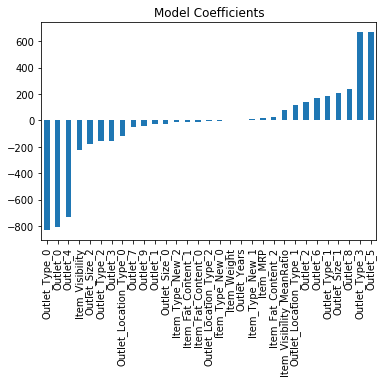

In [77]:
#Linear Regression Model
predictors = [x for x in train_df.columns if x not in [target]+IDcol]

# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train_df, test_df, predictors, target, IDcol, 'Data/BigMartSalesPrediction/alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1129
CV Score : Mean - 0.7471 | Std - 0.01819 | Min - 0.7032 | Max - 0.7828


/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


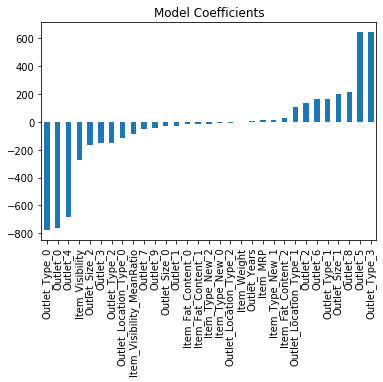

In [78]:
#Ridge Regression Model:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'Data/BigMartSalesPrediction/alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1058
CV Score : Mean - 0.7657 | Std - 0.02573 | Min - 0.7039 | Max - 0.8193


/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


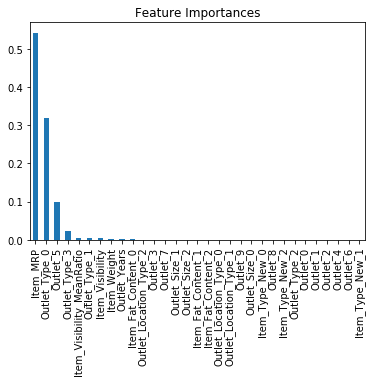

In [79]:
# Decision Tree Regressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'Data/BigMartSalesPrediction/alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1071
CV Score : Mean - 0.7635 | Std - 0.02464 | Min - 0.7032 | Max - 0.8087


/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


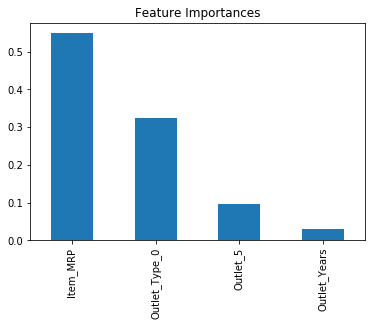

In [80]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'Data/BigMartSalesPrediction/alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1073
CV Score : Mean - 0.7698 | Std - 0.0218 | Min - 0.7228 | Max - 0.8048


/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


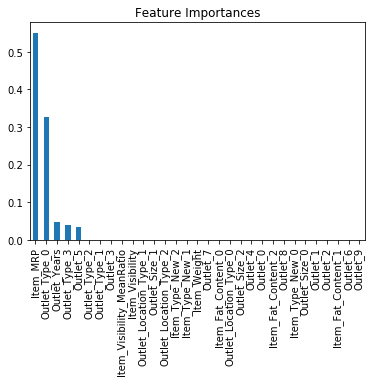

In [81]:
# Random Forest Regressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'Data/BigMartSalesPrediction/alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1068
CV Score : Mean - 0.7703 | Std - 0.02231 | Min - 0.7208 | Max - 0.8066


/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


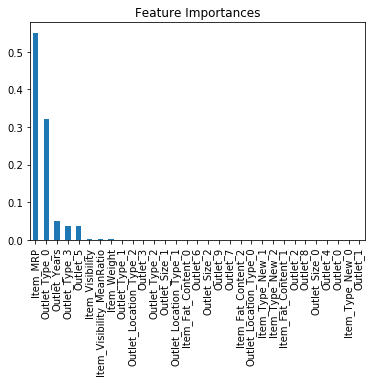

In [82]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'Data/BigMartSalesPrediction/alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')